In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ydata_profiling
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split ,GridSearchCV , learning_curve
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\PC GAMER\\Desktop\\Car_Prices.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
data.head(5)

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [4]:
data.shape

(117927, 10)

In [5]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117927 non-null  object
 1   model            117927 non-null  object
 2   generation_name  87842 non-null   object
 3   year             117927 non-null  int64 
 4   mileage          117927 non-null  int64 
 5   vol_engine       117927 non-null  int64 
 6   fuel             117927 non-null  object
 7   city             117927 non-null  object
 8   province         117927 non-null  object
 9   price            117927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.0+ MB


In [7]:
categorical = data.select_dtypes(include=['object'])
numerical = data.select_dtypes(include=['int64','float64'])

In [8]:
for column in data.columns:
    print(f'{column} has {len(data[column].unique())} unique value : {data[column].unique()}')
    print('-'*100)

mark has 23 unique value : ['opel' 'audi' 'bmw' 'volkswagen' 'ford' 'mercedes-benz' 'renault'
 'toyota' 'skoda' 'alfa-romeo' 'chevrolet' 'citroen' 'fiat' 'honda'
 'hyundai' 'kia' 'mazda' 'mini' 'mitsubishi' 'nissan' 'peugeot' 'seat'
 'volvo']
----------------------------------------------------------------------------------------------------
model has 328 unique value : ['combo' 'vectra' 'adam' 'agila' 'ampera' 'antara' 'astra' 'corsa'
 'crossland-x' 'frontera' 'grandland-x' 'insignia' 'vivaro' 'zafira' 'a3'
 'karl' 'meriva' 'mokka' 'omega' 'signum' 'tigra' '80' 'a1' 'a2' 'a4'
 'a4-allroad' 'a5' 'a6' 'a6-allroad' 'a7' 'a8' 'e-tron' 'q2' 'q3'
 'q4-sportback' 'q5' 'q7' 'q8' 'rs3' 'rs5' 'rs6' 'rs-q3' 's3' 's5' 's8'
 'sq5' 'tt' '3gt' '5gt' 'i3' 'm2' 'm3' 'm4' 'm5' 'm8' 'seria-1' 'seria-2'
 'seria-3' 'seria-4' 'seria-5' 'seria-6' 'seria-7' 'seria-8' 'x1' 'x2'
 'x3' 'x4' 'x5' 'x5-m' 'x6' 'x6-m' 'x7' 'amarok' 'arteon' 'beetle' 'caddy'
 'california' 'caravelle' 'cc' 'crafter' 'eos' 'fox' 'golf

In [9]:
data['province'].value_counts()

province
Mazowieckie                 22219
Śląskie                     16706
Wielkopolskie               14016
Małopolskie                  9756
Dolnośląskie                 8838
Łódzkie                      7884
Pomorskie                    7605
Kujawsko-pomorskie           5371
Lubelskie                    4740
Zachodniopomorskie           3963
Podkarpackie                 3553
Świętokrzyskie               3337
Warmińsko-mazurskie          2956
Lubuskie                     2743
Podlaskie                    2123
Opolskie                     2073
Moravian-Silesian Region       35
Berlin                          3
Wiedeń                          2
Niedersachsen                   1
(                               1
Trenczyn                        1
Nordrhein-Westfalen             1
Name: count, dtype: int64

In [10]:
data.drop(data[data['province']=='('].index,inplace=True)

In [11]:
data.groupby('mark')['model'].count().sort_values(ascending = False)

mark
audi             12031
opel             11914
bmw              11070
volkswagen       10848
ford              9664
mercedes-benz     7136
renault           6976
skoda             5888
toyota            5119
peugeot           5056
volvo             4384
hyundai           4032
kia               3744
nissan            3072
fiat              2880
mazda             2848
seat              2848
citroen           2720
honda             2176
mitsubishi        1120
mini              1088
alfa-romeo         704
chevrolet          608
Name: model, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'opel'),
  Text(1, 0, 'audi'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'volkswagen'),
  Text(4, 0, 'ford'),
  Text(5, 0, 'mercedes-benz'),
  Text(6, 0, 'renault'),
  Text(7, 0, 'toyota'),
  Text(8, 0, 'skoda'),
  Text(9, 0, 'alfa-romeo'),
  Text(10, 0, 'chevrolet'),
  Text(11, 0, 'citroen'),
  Text(12, 0, 'fiat'),
  Text(13, 0, 'honda'),
  Text(14, 0, 'hyundai'),
  Text(15, 0, 'kia'),
  Text(16, 0, 'mazda'),
  Text(17, 0, 'mini'),
  Text(18, 0, 'mitsubishi'),
  Text(19, 0, 'nissan'),
  Text(20, 0, 'peugeot'),
  Text(21, 0, 'seat'),
  Text(22, 0, 'volvo')])

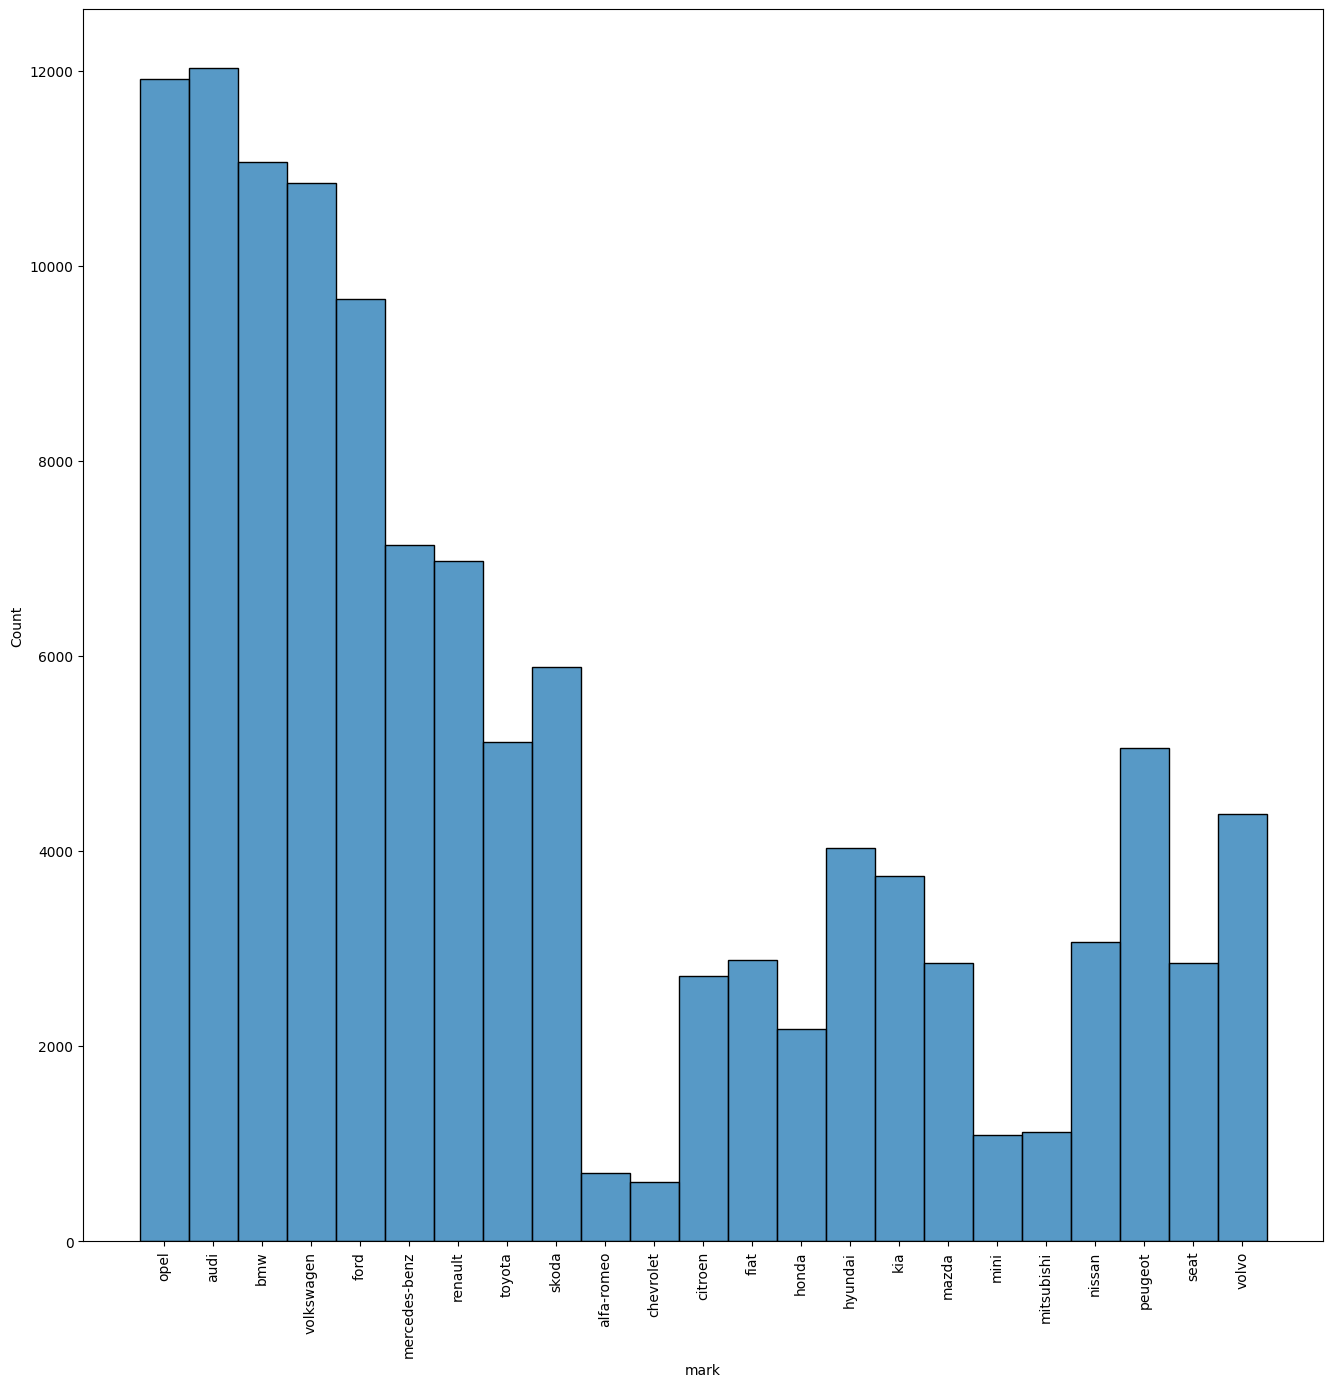

In [12]:
plt.figure(figsize=(16,16))
sns.histplot(x='mark',data=data )
plt.xticks( rotation=90)

In [13]:
data.groupby(['mark','fuel'])['fuel'].count()

mark        fuel    
alfa-romeo  Diesel       256
            Gasoline     428
            LPG           20
audi        CNG            2
            Diesel      6668
                        ... 
volvo       Diesel      2567
            Electric      10
            Gasoline    1406
            Hybrid       303
            LPG           98
Name: fuel, Length: 114, dtype: int64

<Axes: xlabel='count', ylabel='fuel'>

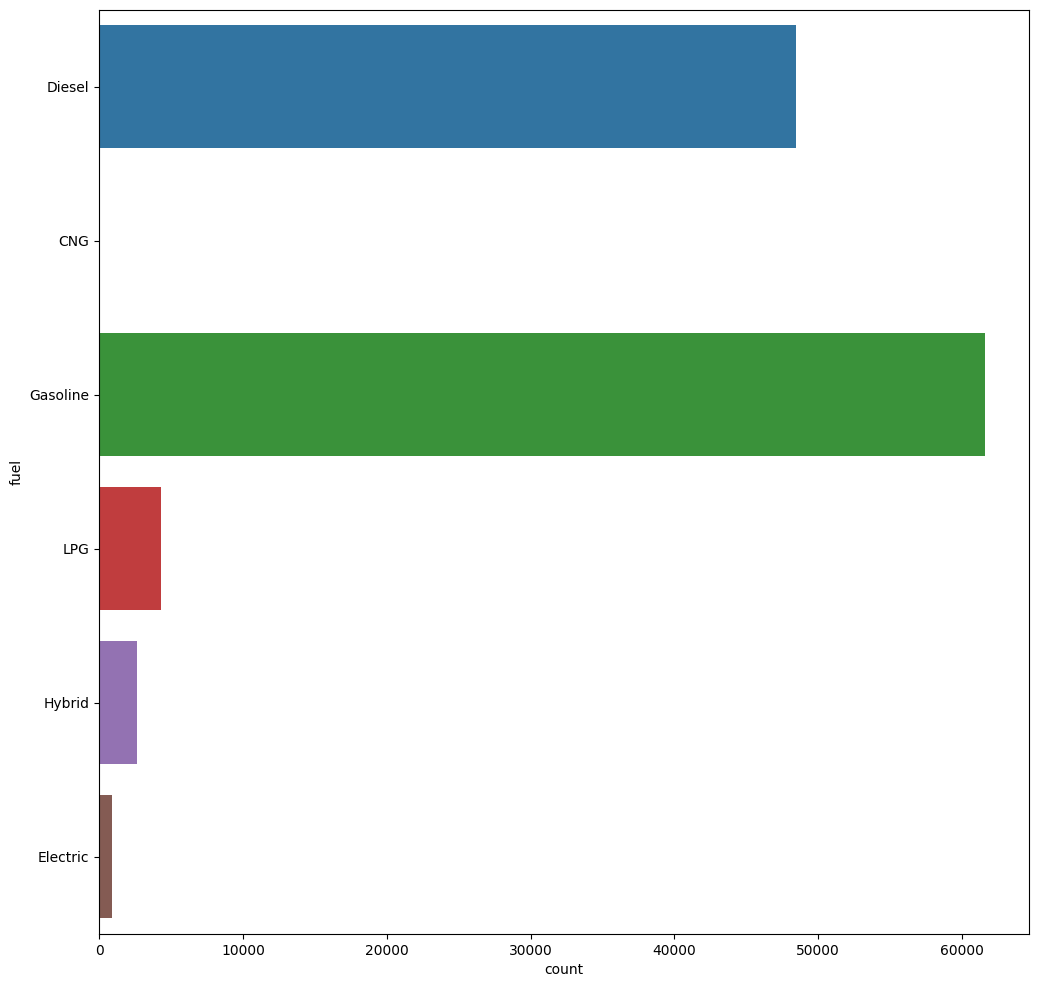

In [14]:
plt.figure(figsize=(12,12))
sns.countplot(y='fuel',data=data )

In [15]:
data.groupby('year')['price'].mean().sort_values(ascending = False) 

year
1968    369900.000000
2022    201810.500478
2021    198077.259778
2020    173187.697958
1952    149900.000000
1966    134414.285714
1964    129450.000000
2019    129217.720962
1967    127225.000000
1965    119900.000000
1969    111950.000000
2018    103928.212097
2017     88858.070939
2016     75301.166073
2015     63534.343465
1973     61332.666667
1988     57164.285714
2014     52806.433581
1978     50250.000000
1972     49000.000000
1983     45900.000000
1990     45644.277778
2013     45583.923049
1992     43737.480000
1945     40900.000000
2012     40218.686378
1986     37950.000000
2011     33017.610976
1970     32887.500000
2010     29477.246875
1993     27938.400000
1991     27787.423077
1996     26588.808081
2009     24129.625220
1989     23559.700000
1971     23066.666667
2008     22258.029259
1974     21900.000000
1995     21656.169492
2007     19739.359547
2006     17634.007571
1987     17200.000000
1994     16922.339623
1997     16016.891892
2005     15876.133277
2004 

In [16]:
year_mean =data.groupby('year')['price'].mean()

Text(0.5, 1.0, 'Mean price of cars per year')

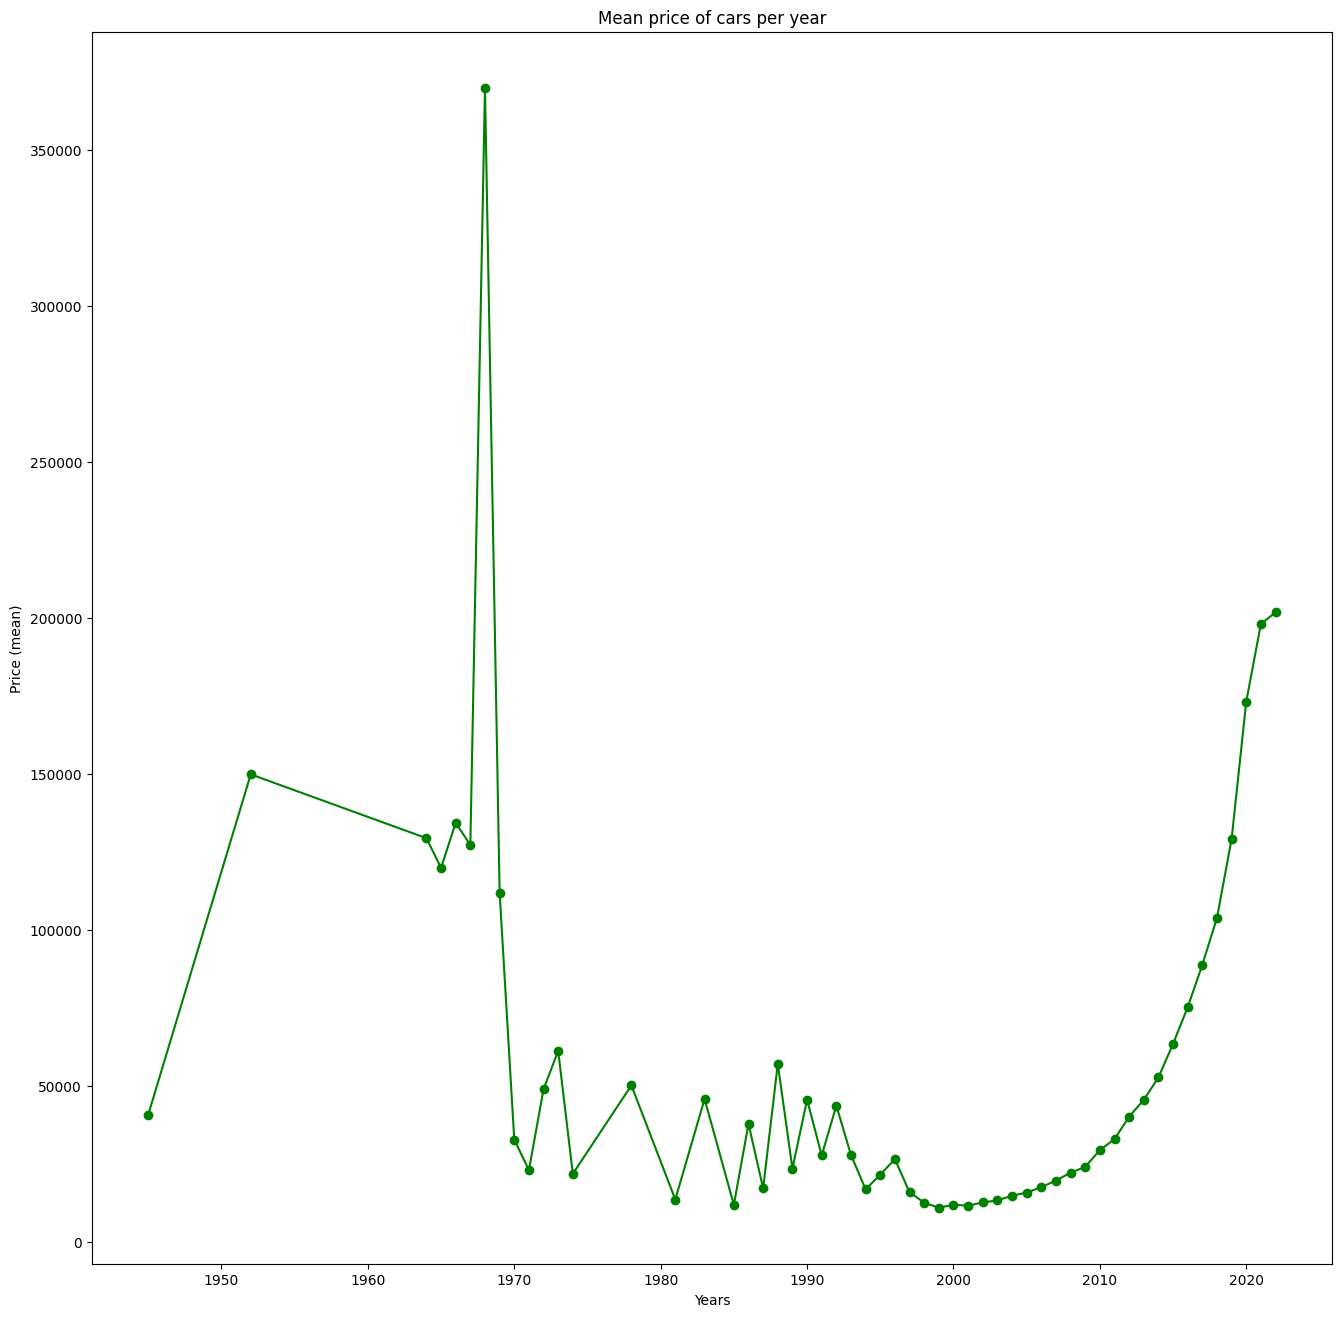

In [17]:
plt.figure(figsize=(16,16))
plt.plot(year_mean,marker = 'o' , color = 'green')
plt.xlabel('Years')
plt.ylabel('Price (mean)')
plt.title('Mean price of cars per year')

In [18]:
province_price_mean = data.groupby('province')['price'].mean()
province_price_mean

province
Berlin                       23332.666667
Dolnośląskie                 66654.488119
Kujawsko-pomorskie           69324.851052
Lubelskie                    49406.902532
Lubuskie                     62375.652570
Mazowieckie                  74438.701607
Małopolskie                  68430.775830
Moravian-Silesian Region     95078.314286
Niedersachsen               115000.000000
Nordrhein-Westfalen          19900.000000
Opolskie                     71481.953690
Podkarpackie                 56318.752041
Podlaskie                    67980.044277
Pomorskie                    84231.164366
Trenczyn                      8499.000000
Warmińsko-mazurskie          62047.470230
Wiedeń                       13900.000000
Wielkopolskie                64643.910888
Zachodniopomorskie           59405.454201
Łódzkie                      75589.222095
Śląskie                      81237.557405
Świętokrzyskie               56089.222056
Name: price, dtype: float64

Text(0.5, 1.0, 'Mean price of cars per province')

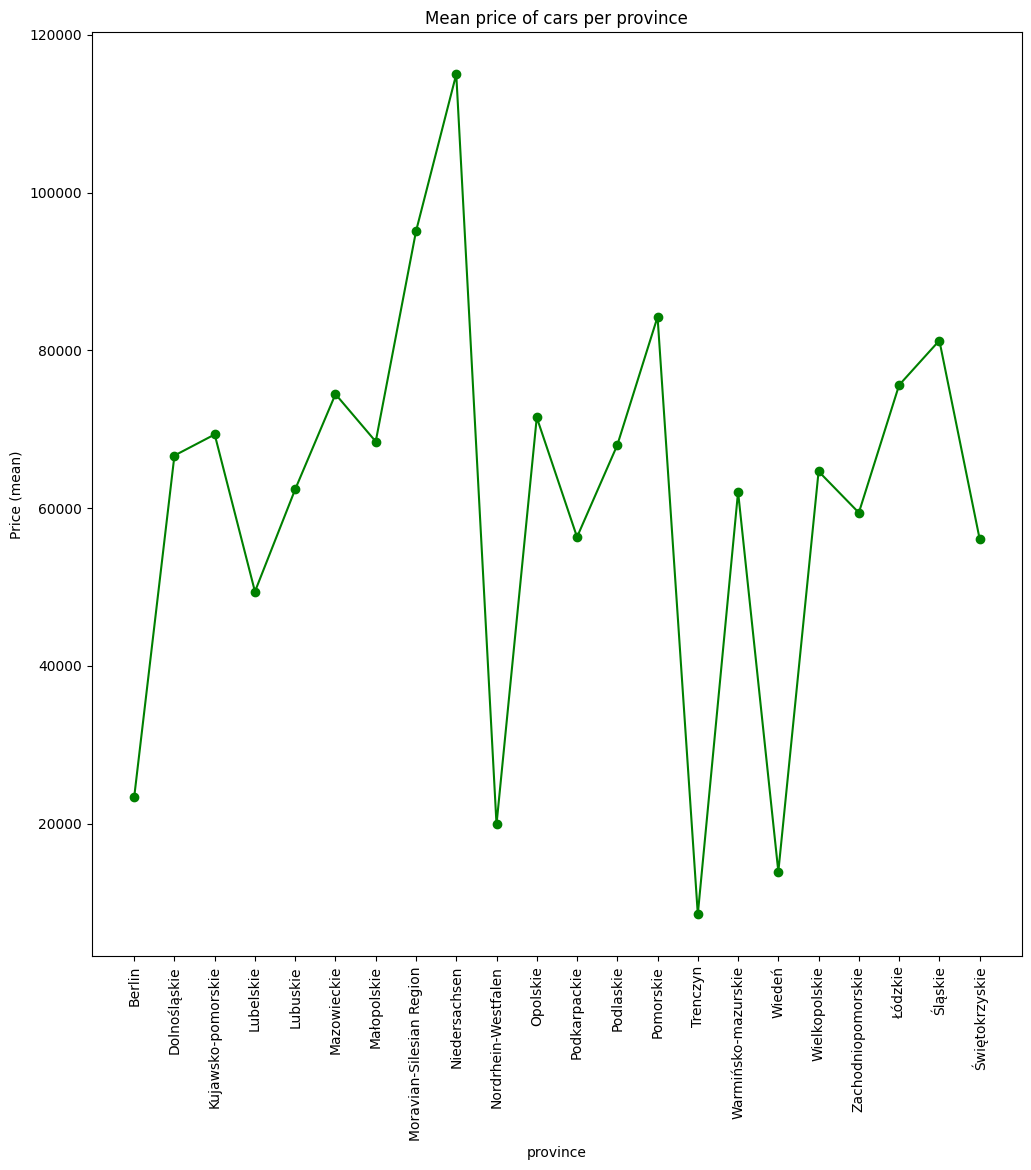

In [19]:
plt.figure(figsize=(12,12))
plt.plot(province_price_mean,marker = 'o' , color = 'green')
plt.xticks(rotation = 90)
plt.xlabel('province')
plt.ylabel('Price (mean)')
plt.title('Mean price of cars per province')

In [20]:
year_mileage = data.groupby('year')['mileage'].sum()
year_mileage

year
1945         68000
1952          1000
1964         48510
1965        361856
1966        717815
1967       1189000
1968        295716
1969        195934
1970        230015
1971        257965
1972         40093
1973        177446
1974         99999
1978        377792
1981        451500
1983        132000
1985        691350
1986        755000
1987        708101
1988       1555570
1989       1831398
1990       3738141
1991       5102155
1992       5042386
1993       5886601
1994      13000461
1995      14535831
1996      23793069
1997      35596268
1998      65629201
1999     101111862
2000     121623514
2001     181098088
2002     277933788
2003     412211750
2004     610507935
2005     793015214
2006    1035999464
2007    1244843349
2008    1362987370
2009    1329385946
2010    1215106606
2011    1222625105
2012    1081289131
2013     883577889
2014     864161664
2015     813403305
2016     838669354
2017     930289970
2018     750616612
2019     274524841
2020      74046118
2021   

# Feature Selection

In [21]:
categorical = ['mark','model','generation_name','city','province']
data.drop(categorical,axis = 1 , inplace=True)

In [22]:
one_hot = pd.get_dummies(data['fuel']).astype(int)
one_hot

,CNG,Diesel,Electric,Gasoline,Hybrid,LPG
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
117922,0,0,0,0,1,0
117923,0,1,0,0,0,0
117924,0,0,0,1,0,0
117925,0,1,0,0,0,0


In [23]:
data = pd.concat([data,one_hot],axis=1).drop('fuel',axis=1)

In [24]:
data

,year,mileage,vol_engine,price,CNG,Diesel,Electric,Gasoline,Hybrid,LPG
0,2015,139568,1248,35900,0,1,0,0,0,0
1,2018,31991,1499,78501,0,1,0,0,0,0
2,2015,278437,1598,27000,0,1,0,0,0,0
3,2016,47600,1248,30800,0,1,0,0,0,0
4,2014,103000,1400,35900,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,222790,0,0,0,0,1,0
117923,2017,51000,1969,229900,0,1,0,0,0,0
117924,2016,83500,1969,135000,0,0,0,1,0,0
117925,2017,174000,1969,154500,0,1,0,0,0,0


In [25]:
Ones= np.ones((data.shape[0],1)).astype(int)
data.insert(0, 'dummies',Ones)

In [26]:
data

,dummies,year,mileage,vol_engine,price,CNG,Diesel,Electric,Gasoline,Hybrid,LPG
0,1,2015,139568,1248,35900,0,1,0,0,0,0
1,1,2018,31991,1499,78501,0,1,0,0,0,0
2,1,2015,278437,1598,27000,0,1,0,0,0,0
3,1,2016,47600,1248,30800,0,1,0,0,0,0
4,1,2014,103000,1400,35900,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
117922,1,2020,40000,1969,222790,0,0,0,0,1,0
117923,1,2017,51000,1969,229900,0,1,0,0,0,0
117924,1,2016,83500,1969,135000,0,0,0,1,0,0
117925,1,2017,174000,1969,154500,0,1,0,0,0,0


# Variable Separation

In [27]:
X = data.drop('price',axis=1).values
y = data['price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [28]:
X_train.shape

(94340, 10)

In [29]:
y_train.shape

(94340,)

In [30]:
linear = LinearRegression()
linear.fit(X_train,y_train)

y_pred_l = linear.predict(X_test)

In [31]:
r2_score(y_test,y_pred_l)

0.5998873517777762

In [38]:
rfr = RandomForestRegressor(n_estimators=2000)
rfr.fit(X_train,y_train)

y_pred_rfr = rfr.predict(X_test)


In [33]:
r2_score(y_test,y_pred_rfr)

0.8775613821658259

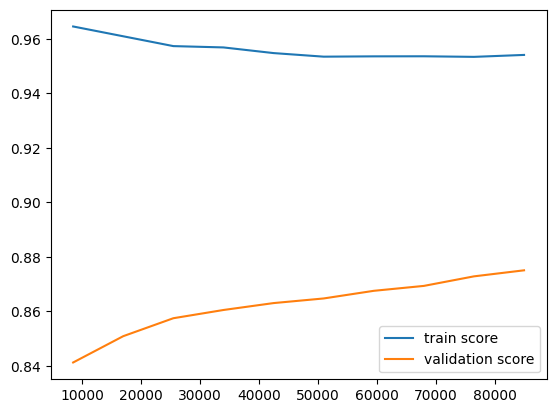

In [37]:
N , train_score , val_score = learning_curve(rfr,X= X_train , y = y_train , train_sizes=np.linspace(0.1,1,10),cv =10)

plt.plot(N,train_score.mean(axis = 1) , label = 'train score')
plt.plot(N,val_score.mean(axis = 1) , label = 'validation score')
plt.legend()